# Getting started with Task 2

Instructions:
- Download the dataset from the [ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)
- Unzip the `archive.zip` file
- Rename the folder `archive` as `ecg_dataset` and place it in the root of the git repository

References:
- [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf)

## Load dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.decomposition import PCA
drive.mount("/content/drive")


Mounted at /content/drive


## MIT-BIH  Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
- Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.
- The final element of each row denotes the class to which that example belongs.


The shape of the mitbih_train is :  (87554, 188)
The shape of the mitbih_test is :  (21892, 188)
The last time value is :  1488.0


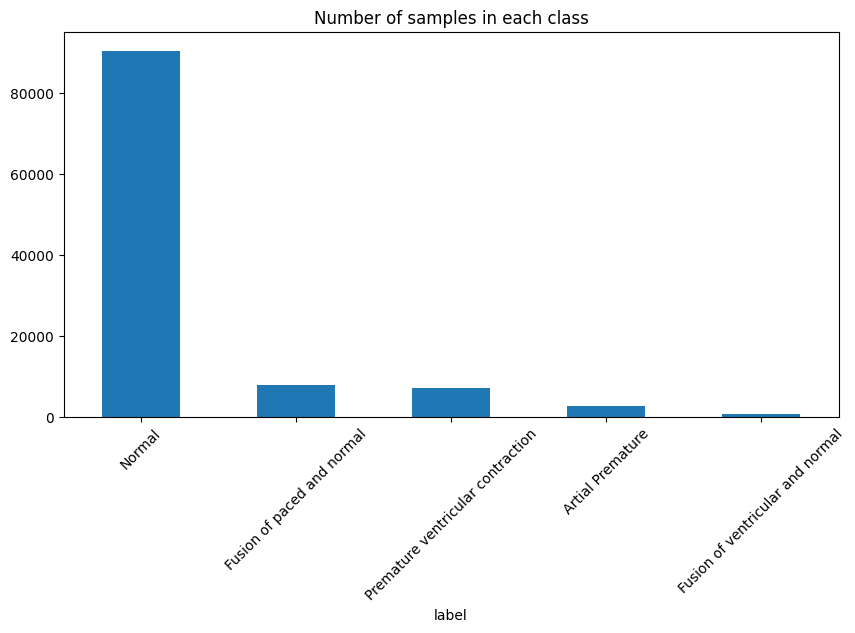

In [2]:
df_mitbih_train = pd.read_csv("/content/drive/My Drive/Task_2/mitbih_train.csv", header = None)
df_mitbih_test = pd.read_csv("/content/drive/My Drive/Task_2/mitbih_test.csv", header = None)

# print shapes of the dataframes
print("The shape of the mitbih_train is : ", df_mitbih_train.shape)
print("The shape of the mitbih_test is : ", df_mitbih_test.shape)

df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0,ignore_index=True)
df_mitbih.rename(columns={187: 'label'}, inplace=True)

id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
#df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_mitbih.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_mitbih.columns = list(time) + ["label"]



In [ ]:
print(counts)

label
Normal                               90589
Fusion of paced and normal            8039
Premature ventricular contraction     7236
Artial Premature                      2779
Fusion of ventricular and normal       803
Name: count, dtype: int64


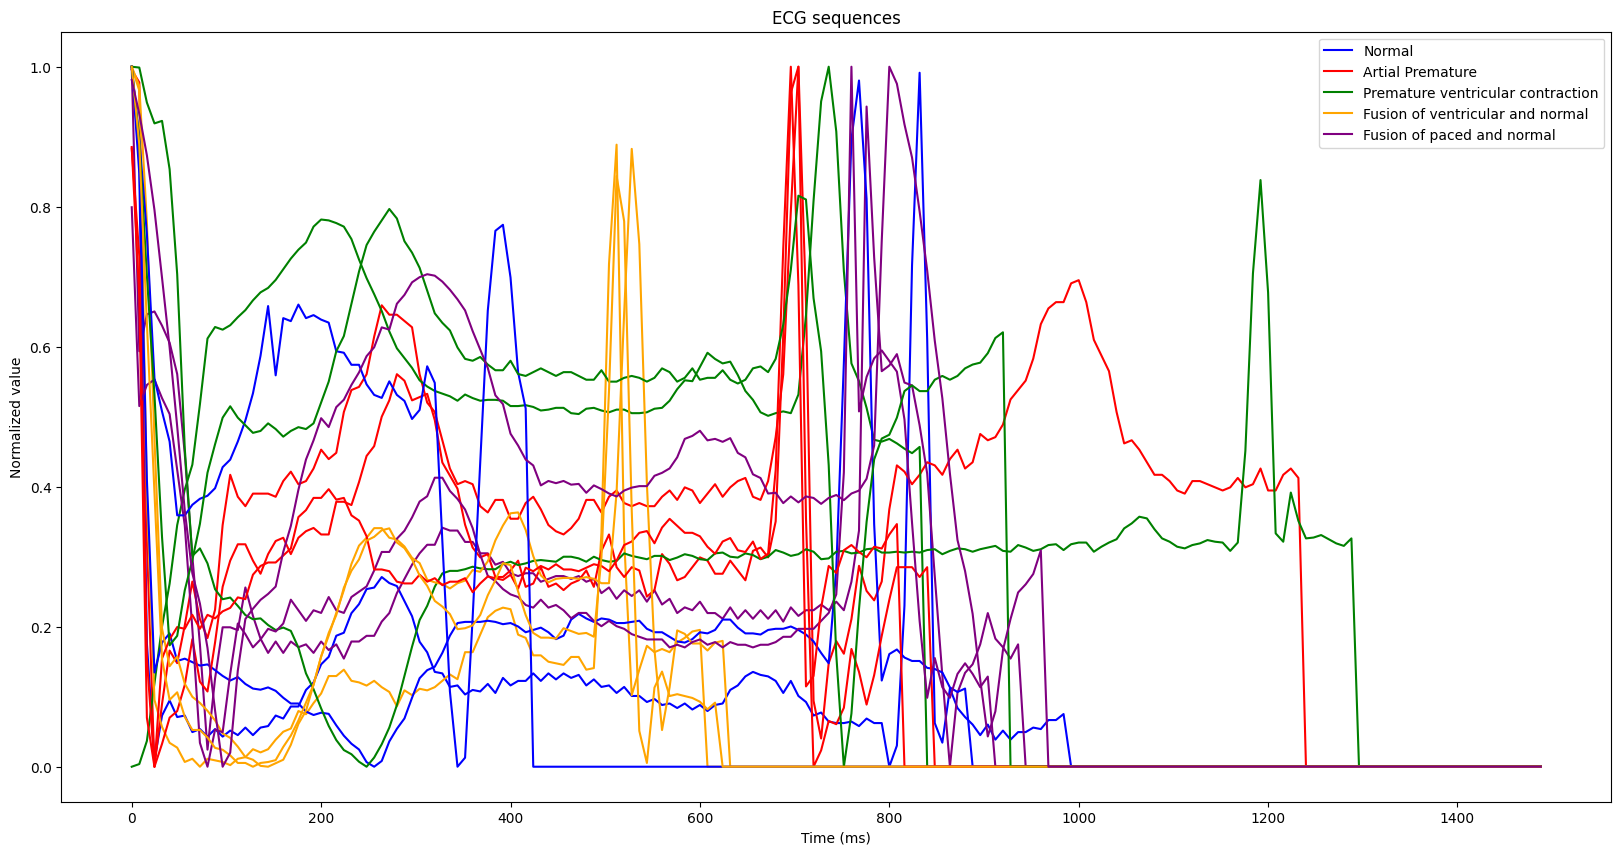

In [ ]:
# create a figure
plt.figure(figsize = (20, 10))
# define colors for each class
colors = ["blue", "red", "green", "orange", "purple"]
# plot the normal sequences
for i in range(3):
    for label in id_to_label.keys():
        # sample a random sequence from that label
        df_mitbih_label = df_mitbih[df_mitbih["label"] == label].sample(1)
        # plot the sequence
        if i == 0:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], label = id_to_label[label], color = colors[label])
        else:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], color = colors[label])
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

In [ ]:
df_mitbih_train, df_mitbih_test = train_test_split(df_mitbih,
                                                       shuffle = True,
                                                       random_state = 41,
                                                       test_size = .2,stratify=df_mitbih["label"])


In [ ]:
 df_mitbih_tt, df_mitbih_val = train_test_split(df_mitbih_train,
                                                       shuffle = True,
                                                       random_state = 41,
                                                       test_size = .2,stratify=df_mitbih_train["label"])


In [ ]:
df_tt_resampled = pd.DataFrame(columns=df_mitbih_tt.columns)
num_samples = 8500
for i in range(5):
  dfi = df_mitbih_tt[(df_mitbih_tt['label']==i)]
  df_sampled = resample(dfi, replace=True, n_samples= num_samples, random_state=42)
  df_tt_resampled = pd.concat([df_tt_resampled,df_sampled],ignore_index = True)

In [ ]:
counts = df_tt_resampled["label"].value_counts()

In [ ]:
print(counts)

label
0.0    8500
1.0    8500
2.0    8500
3.0    8500
4.0    8500
Name: count, dtype: int64


In [ ]:
X_tt = df_tt_resampled.drop("label",axis=1)
y_tt = df_tt_resampled["label"]

In [ ]:
X_val,y_val = df_mitbih_val.drop("label",axis=1),df_mitbih_val["label"]

In [ ]:
X_test,y_test = df_mitbih_test.drop("label",axis=1),df_mitbih_test["label"]

In [ ]:
## Make an decision tree object
depth = 10
tree_clf = DecisionTreeClassifier(max_depth=depth)

## fit the classifier
tree_clf.fit(X_tt, y_tt)

DecisionTreeClassifier(max_depth=10)

In [ ]:
confusion_matrix(y_val,tree_clf.predict(X_val))

array([[11984,  1232,   558,   482,   239],
       [   80,   354,     4,     4,     3],
       [   68,    31,   985,    38,    36],
       [   18,     1,     8,    96,     5],
       [   44,    14,    26,     4,  1198]])

In [ ]:
f1_score(y_val,tree_clf.predict(X_val),average=None)

array([0.89804788, 0.34087626, 0.7192406 , 0.25531915, 0.86591977])

In [ ]:
confusion_matrix(y_test,tree_clf.predict(X_test))

array([[17943,    61,    62,    29,    23],
       [  243,   307,     6,     0,     0],
       [  266,     7,  1146,    14,    14],
       [  102,     1,     5,    53,     0],
       [  179,     0,    26,     0,  1403]])

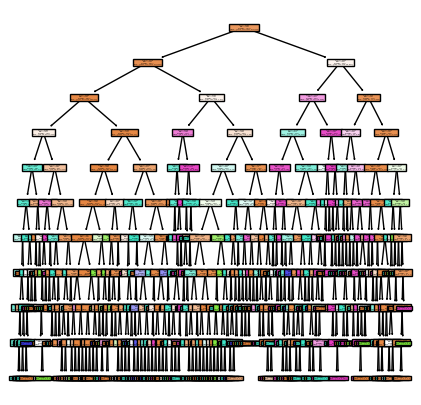

In [ ]:
plt.figure(figsize = (5,5))
tree.plot_tree(tree_clf, filled = True)
plt.show()

# Implementing PCA

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_tt)

PCA()

In [ ]:
p = pca.explained_variance_

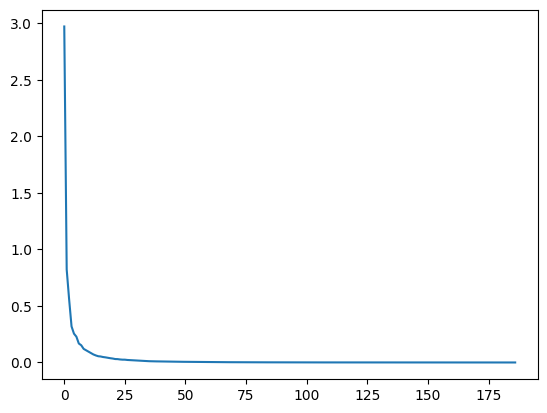

In [ ]:
plt.plot(p)

In [ ]:
print(p[:15])

[2.97350473 0.82307397 0.55952645 0.319275   0.25519673 0.2283296
 0.16801115 0.15237809 0.12031407 0.10784912 0.09510099 0.08196294
 0.07117886 0.06243799 0.05535962]


In [ ]:
X_tt_transformed = pca.transform(X_tt)

In [ ]:
X_val_transformed = pca.transform(X_val)

In [ ]:
X_test_transformed = pca.transform(X_test)

In [ ]:
num_components = 180
depth = 10
tree_clf = DecisionTreeClassifier(max_depth=depth)

## fit the classifier
tree_clf.fit(X_tt_transformed[:,:num_components], y_tt)

pred = tree_clf.predict(X_val_transformed[:,:num_components])

print(accuracy_score(y_val,pred))
print(f1_score(y_val,pred,average=None))

0.7907720420283234
[0.86681021 0.28787879 0.63621095 0.21436464 0.86294416]
